In [1]:
import json
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

data_dir = "/content/drive/MyDrive/UDL MP/data" #CHANGE to the path or where you have downloaded "data"

Mounted at /content/drive


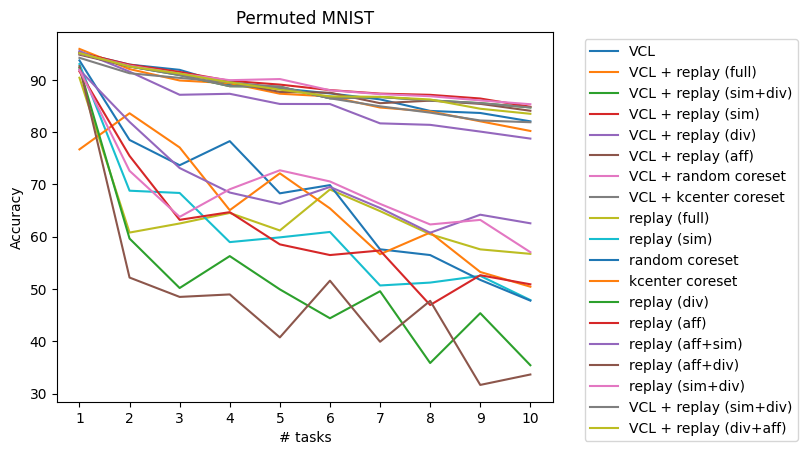

In [3]:
#@title Permuted MNIST results

x = [i for i in range(1,11)]
file_names = ['VCL','VCL + replay (full)','VCL + replay (sim+div)','VCL + replay (sim)','VCL + replay (div)','VCL + replay (aff)','VCL + random coreset','VCL + kcenter coreset','replay (full)', 'replay (sim)', 'random coreset', 'kcenter coreset','replay (div)', 'replay (aff)', 'replay (aff+sim)', 'replay (aff+div)', 'replay (sim+div)', 'VCL + replay (sim+div)', 'VCL + replay (div+aff)']

for file_name in file_names:
  y = []
  for i in range(1,11):
    with open(data_dir+"/Permuted MNIST/" + file_name + "/Task " + str(i), 'r') as json_file:
        data = json.load(json_file)
        y.append(data['mean'])
  plt.plot(x, y, label=file_name)

plt.xlabel('# tasks')
plt.xticks(x)
plt.ylabel('Accuracy')
plt.title('Permuted MNIST')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

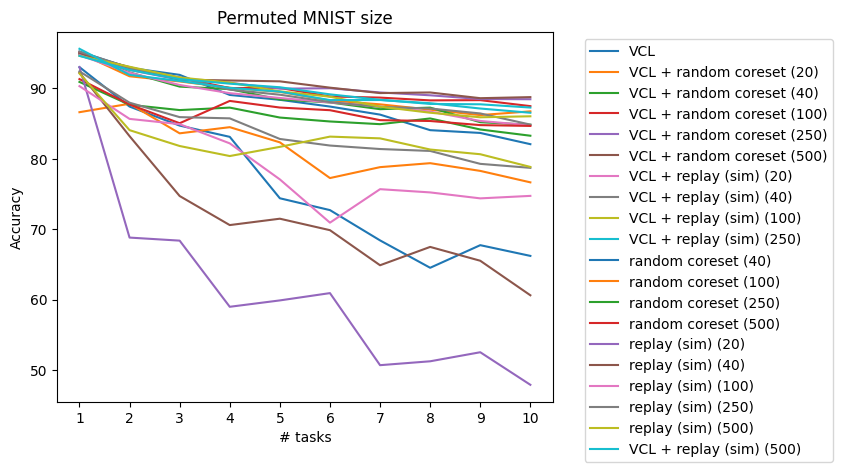

In [9]:
#@title Permuted MNIST size results

x = [i for i in range(1,11)]
file_names = ['VCL','VCL + random coreset (20)','VCL + random coreset (40)','VCL + random coreset (100)','VCL + random coreset (250)','VCL + random coreset (500)',"VCL + replay (sim) (20)","VCL + replay (sim) (40)","VCL + replay (sim) (100)","VCL + replay (sim) (250)", 'random coreset (40)','random coreset (100)','random coreset (250)','random coreset (500)','replay (sim) (20)','replay (sim) (40)','replay (sim) (100)','replay (sim) (250)','replay (sim) (500)', 'VCL + replay (sim) (500)']

for file_name in file_names:
  y = []
  for i in range(1,11):
    with open(data_dir+"/Permuted MNIST size/" + file_name + "/Task " + str(i), 'r') as json_file:
        data = json.load(json_file)
        y.append(data['mean'])
  plt.plot(x, y, label=file_name)

plt.xlabel('# tasks')
plt.xticks(x)
plt.ylabel('Accuracy')
plt.title('Permuted MNIST size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

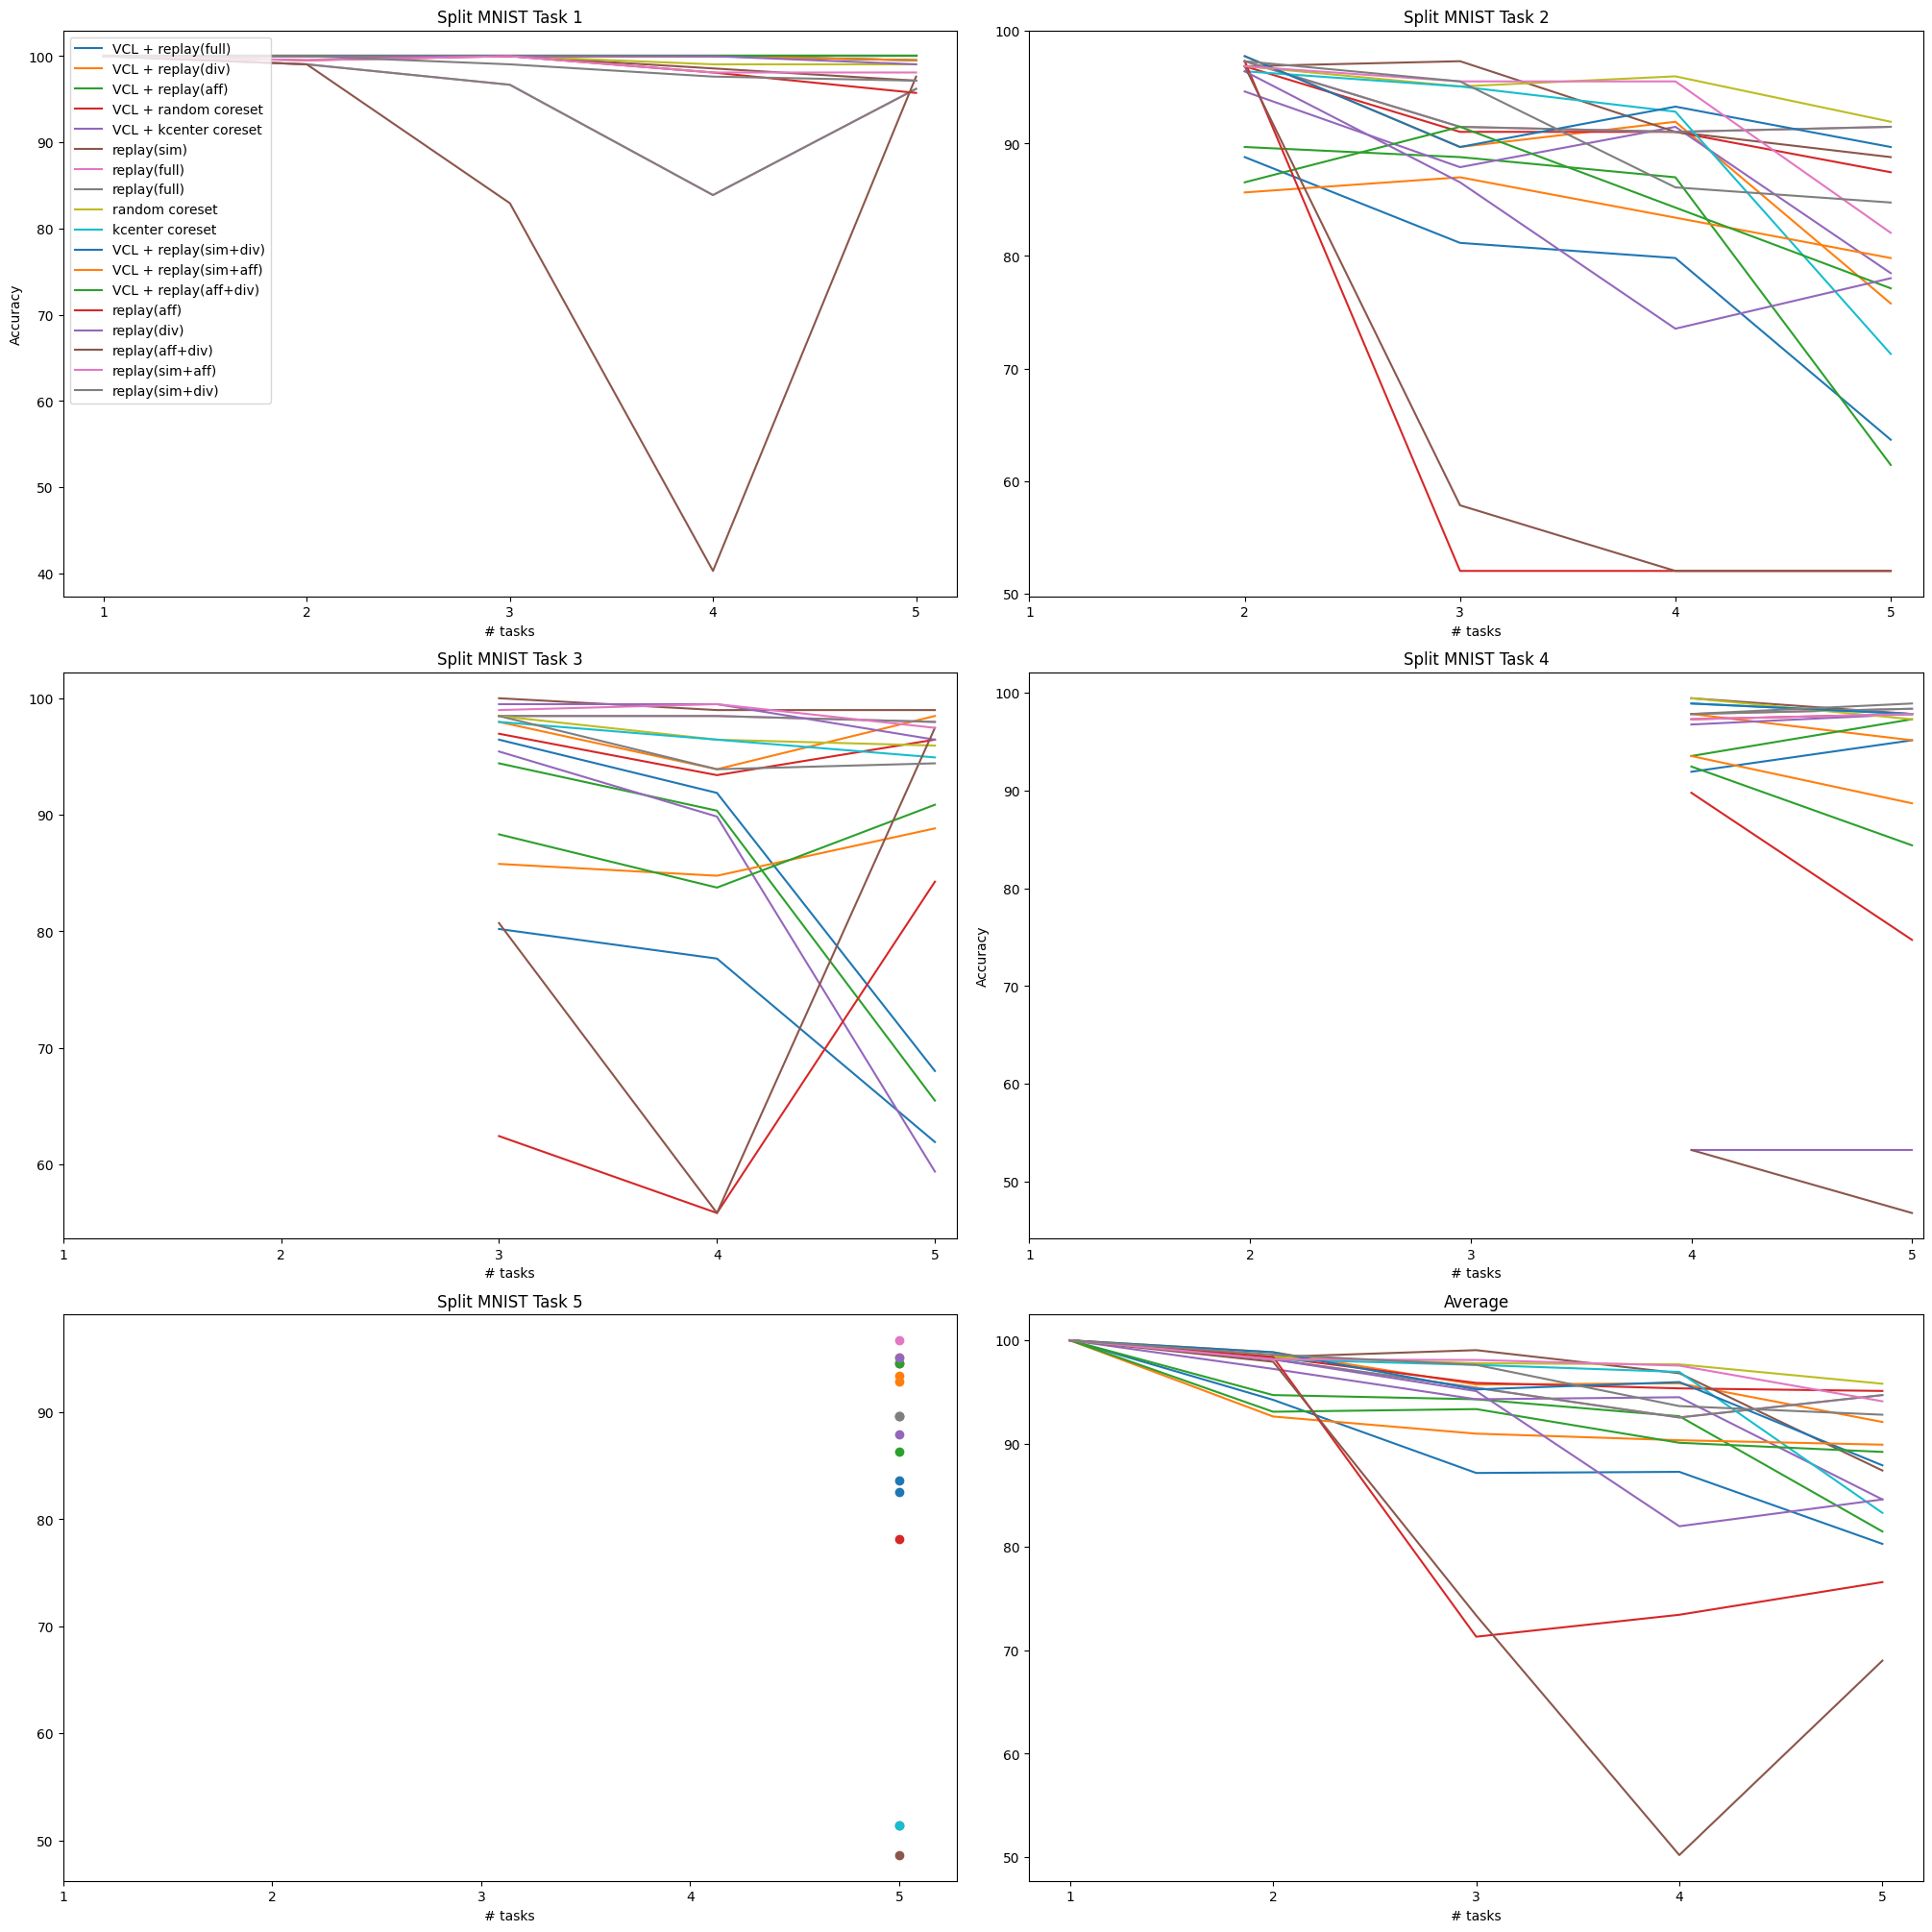

In [14]:
#@title Split MNIST results

x = [1,2,3,4,5]
tasks = ['Task 1','Task 2','Task 3','Task 4','Task 5']
#file_names = ['VCL + replay(full)','VCL + replay(div)','VCL + replay(aff)','VCL + random coreset','VCL + kcenter coreset', 'replay(sim)','replay(full) (v2)', 'replay(full)', 'random coreset', 'kcenter coreset (run2)', 'kcenter coreset']
file_names = ['VCL + replay(full)','VCL + replay(div)','VCL + replay(aff)','VCL + random coreset','VCL + kcenter coreset', 'replay(sim)','replay(full)', 'replay(full)', 'random coreset', 'kcenter coreset ', 'VCL + replay(sim+div)', 'VCL + replay(sim+aff)','VCL + replay(aff+div)','replay(aff)', 'replay(div)','replay(aff+div)','replay(sim+aff)','replay(sim+div)']

plt.figure(figsize=(20,20), constrained_layout=True)

for idx, t in enumerate(tasks):
  plt.subplot(3, 2, idx+1)
  for file_name in file_names:
    y = [None for i in range(idx)]
    for i in range(idx+1,6):
      with open(data_dir+"/Split MNIST/" + file_name + "/Task " + str(i), 'r') as json_file:
          data = json.load(json_file)
          y.append(data['task'][idx])
    if t != 'Task 5':
      plt.plot(x, y, label=file_name)
    else:
      plt.scatter(x,y, label=file_name)
  plt.xlabel('# tasks')
  plt.xticks(x)
  if idx==0 or idx ==3:
    plt.ylabel('Accuracy')
  plt.title("Split MNIST " + t)
plt.subplot(3,2,6)
for file_name in file_names:
  y = []
  for i in range(1,6):
    with open(data_dir+"/Split MNIST/" + file_name + "/Task " + str(i), 'r') as json_file:
        data = json.load(json_file)
        y.append(data['mean'])
  plt.plot(x, y, label=file_name)
plt.xlabel('# tasks')
plt.xticks(x)
plt.title('Average')

plt.subplot(3, 2, 1).legend(loc='upper left')
plt.show()